In [2]:
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
import src.util as utils
from sklearn.preprocessing import LabelEncoder

## Load Configuration File

In [3]:
config = utils.load_config()

## Preprocessing Data

In [4]:
def read_raw_data(config: dict) -> pd.DataFrame:
    # Return raw dataset
    return pd.read_csv(config["dataset_path"])

In [5]:
config = utils.load_config()
dt_irregular = read_raw_data(config)
dt_irregular.head()

time  kemendagri_kabupaten_kode  \
0  2022-07-06 00:00:00.000                      32.75   
1  2022-07-06 01:00:00.000                      32.75   
2  2022-07-06 01:00:00.000                      32.75   
3  2022-07-06 06:00:00.000                      32.75   
4  2022-07-06 06:00:00.000                      32.75   

  kemendagri_kabupaten_nama                           street  jam_level  \
0               KOTA BEKASI  Tol Cikampek (Cikunir-Cikarang)          4   
1               KOTA BEKASI  Tol Cikampek (Cikunir-Cikarang)          4   
2               KOTA BEKASI  Tol Cikampek (Cikunir-Cikarang)          3   
3               KOTA BEKASI                   Wibawa Mukti 2          4   
4               KOTA BEKASI                   Cipendawa Baru          4   

   median_length  median_delay_seconds  median_regular_speed  total_records  \
0          869.0                 803.5              67.32000             38   
1         1717.0                1049.0              67.48000             12   
2         1985.5                 394.5              67.57001             10   
3         1913.0                1254.0               7.29000             11   
4          708.0                 769.0               6.05000              5   

   cause_type  median_seconds  median_speed        date  median_jam_level  \
0         NaN           674.0      4.355000  2022-07-06               4.0   
1         NaN          1135.0      5.475000  2022-07-06               4.0   
2         NaN           494.0     14.075001  2022-07-06               3.0   
3         NaN          1486.0      4.970000  2022-07-06               4.0   
4         NaN           852.0      2.960000  2022-07-06               4.0   

        id                                           geometry  
0  1493116  MULTILINESTRING ((106.972028 -6.250261, 106.97...  
1  1493118  MULTILINESTRING ((106.972028 -6.250261, 106.97...  
2  1493117  MULTILINESTRING ((106.972028 -6.250261, 106.97...  
3  1493127  MULTILINESTRING ((106.951773 -6.313015, 106.95...  
4  1493119  MULTILINESTRING ((106.975595 -6.299589, 106.97...

In [6]:
dt_irregular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14473 entries, 0 to 14472
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       14473 non-null  object 
 1   kemendagri_kabupaten_kode  14473 non-null  float64
 2   kemendagri_kabupaten_nama  14473 non-null  object 
 3   street                     14360 non-null  object 
 4   jam_level                  14473 non-null  int64  
 5   median_length              14473 non-null  float64
 6   median_delay_seconds       14473 non-null  float64
 7   median_regular_speed       14473 non-null  float64
 8   total_records              14473 non-null  int64  
 9   cause_type                 0 non-null      float64
 10  median_seconds             14473 non-null  float64
 11  median_speed               14473 non-null  float64
 12  date                       14473 non-null  object 
 13  median_jam_level           14473 non-null  flo

In [7]:
dt_irregular.describe().T

count          mean           std          min  \
kemendagri_kabupaten_kode  14473.0  3.275000e+01      0.000000       32.750   
jam_level                  14473.0  3.441097e+00      0.666461        1.000   
median_length              14473.0  1.406260e+03   1222.173324      500.000   
median_delay_seconds       14473.0  5.744575e+02    297.477652     -821.000   
median_regular_speed       14473.0  2.092735e+01     16.206334        3.230   
total_records              14473.0  1.477745e+01     15.529021        1.000   
cause_type                     0.0           NaN           NaN          NaN   
median_seconds             14473.0  7.148761e+02    330.331465      111.000   
median_speed               14473.0  7.787513e+00      5.871103        0.655   
median_jam_level           14473.0  3.441097e+00      0.666461        1.000   
id                         14473.0  1.540917e+06  25476.769004  1493116.000   

                                   25%          50%          75%         max  
kemendagri_kabupaten_kode       32.750       32.750       32.750       32.75  
jam_level                        3.000        4.000        4.000        4.00  
median_length                  732.000     1089.000     1607.000    15551.00  
median_delay_seconds           382.000      543.000      716.000     3777.50  
median_regular_speed            12.730       17.045       22.020      333.86  
total_records                    4.000        9.000       20.000      155.00  
cause_type                         NaN          NaN          NaN         NaN  
median_seconds                 505.000      672.000      870.000     4164.00  
median_speed                     4.325        6.340        9.115       53.68  
median_jam_level                 3.000        4.000        4.000        4.00  
id                         1520113.000  1541030.000  1563276.000  1584500.00

In [8]:
dt_irregular.isnull().sum()

time                             0
kemendagri_kabupaten_kode        0
kemendagri_kabupaten_nama        0
street                         113
jam_level                        0
median_length                    0
median_delay_seconds             0
median_regular_speed             0
total_records                    0
cause_type                   14473
median_seconds                   0
median_speed                     0
date                             0
median_jam_level                 0
id                               0
geometry                         0
dtype: int64

In [6]:
dt_irregular.drop("cause_type", axis=1, inplace=True)

In [7]:
dt_irregular['time']= pd.to_datetime(dt_irregular['time'])
dt_irregular['date']= pd.to_datetime(dt_irregular['date'])

## Data Exploration

In [17]:
pp.ProfileReport(dt_irregular)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: xlabel='median_length', ylabel='median_seconds'>

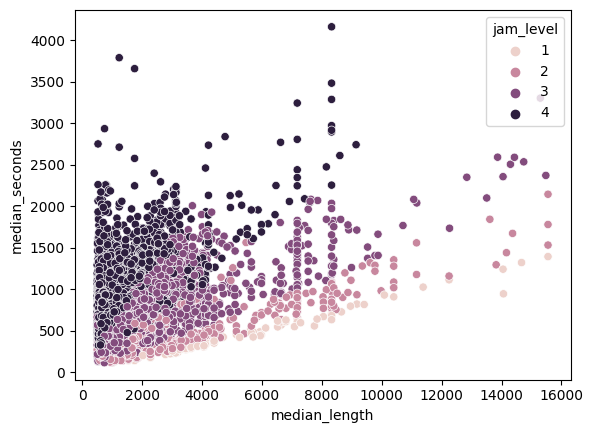

In [16]:
sns.scatterplot(data=dt_irregular, x="median_length", y="median_seconds", hue="jam_level")

In [8]:
dt_irregular["hour"] = dt_irregular['time'].dt.hour
dt_irregular["day"] = dt_irregular['time'].dt.day

In [9]:
street_counts = dt_irregular["street"].value_counts()
list_street = street_counts[street_counts > 150].index.tolist()
list_street

['Narogong Raya',
 'Hankam Raya',
 'Pejuang',
 'Trans Yogi',
 'Kranggan Raya',
 'Jalan Jatiasih',
 'Wibawa Mukti 2',
 'Jatiwaringin Raya',
 'N1 Jalan Raya Bekasi',
 'Perjuangan',
 'Tol Cikampek (Cikunir-Cikarang)',
 'Jati Mekar',
 'Tol Lingkar Luar (TMII-Cikunir)',
 'Haji Djole',
 'Jalan Kampung Sawah Raya',
 'Kaliabang',
 'Karangsatria Raya',
 'Mustikajaya Raya',
 'KH Muchtar Tabrani',
 'Pekayon Jaya',
 'Cipendawa Baru',
 'Jalan Inspeksi Kalimalang',
 'Ratna',
 'KH Noer Ali',
 'Alternatif JORR Tol Jatiwarna']

In [10]:
dt_irregular.dropna(inplace=True)

In [11]:
dt_irregular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14360 entries, 0 to 14472
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       14360 non-null  datetime64[ns]
 1   kemendagri_kabupaten_kode  14360 non-null  float64       
 2   kemendagri_kabupaten_nama  14360 non-null  object        
 3   street                     14360 non-null  object        
 4   jam_level                  14360 non-null  int64         
 5   median_length              14360 non-null  float64       
 6   median_delay_seconds       14360 non-null  float64       
 7   median_regular_speed       14360 non-null  float64       
 8   total_records              14360 non-null  int64         
 9   median_seconds             14360 non-null  float64       
 10  median_speed               14360 non-null  float64       
 11  date                       14360 non-null  datetime64[ns]
 12  medi

In [12]:
dt_new = dt_irregular[["time", "day", "hour", "street", "jam_level", "median_delay_seconds",
       "median_regular_speed", "total_records", "median_seconds",
       "median_speed", "median_jam_level", "median_length"]]
dt_new = dt_new[dt_new["street"].isin(list_street)]

In [13]:
labelencoder = LabelEncoder()
dt_new['street_cat'] = labelencoder.fit_transform(dt_new['street'])

### Correlation Matrix

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25860\258194531.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt_new.corr(method = "spearman"), annot = True, ax = ax)


<AxesSubplot: >

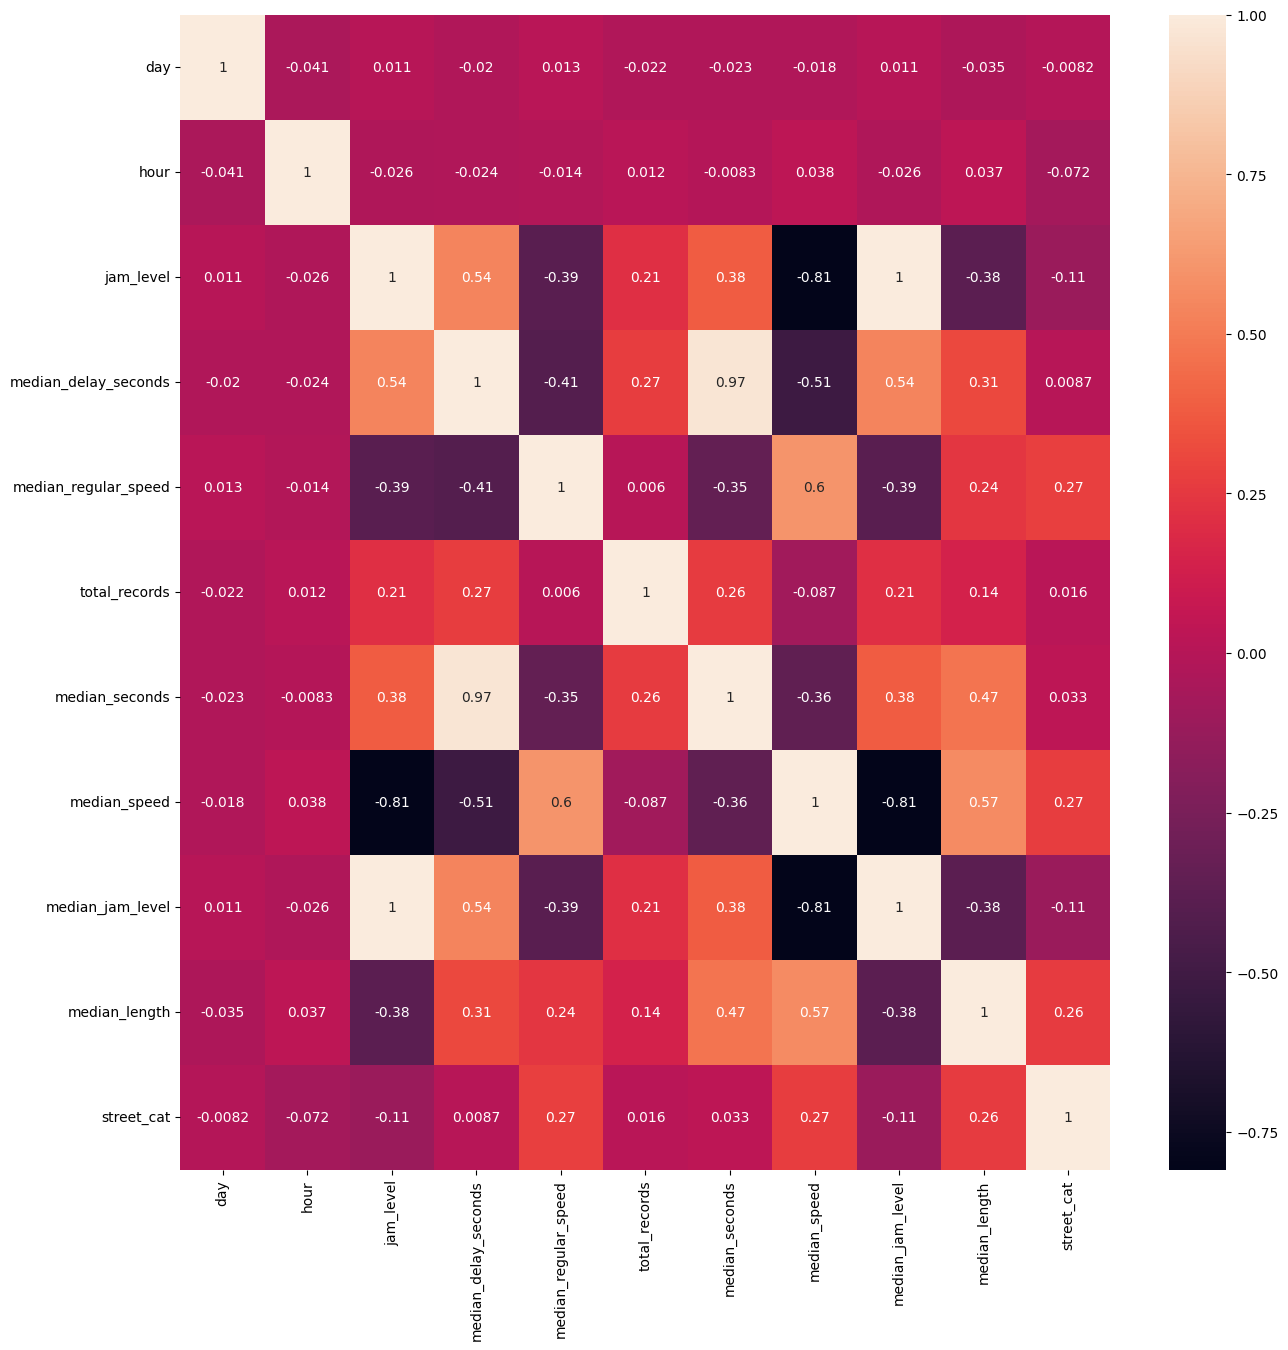

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))  
sns.heatmap(dt_new.corr(method = "spearman"), annot = True, ax = ax)